In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
restaurant_data= pd.read_csv("Resources/zomato.csv",encoding="ISO-8859-1")


In [9]:
x_data = restaurant_data[["Country Code","Cuisines"]]


C:\Users\mitra\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


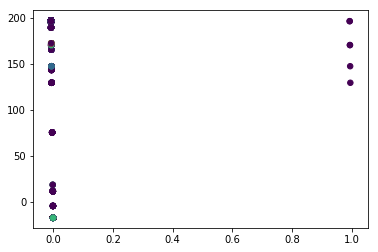

In [19]:
from kmodes import kmodes

df_dummy = pd.get_dummies(x_data)

#transform into numpy array
X = df_dummy.reset_index().values

km = kmodes.KModes(n_clusters=4, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(x_data)
df_dummy['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.ix[:,0:4])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"], s=30)
plt.show()

In [20]:
km.cluster_centroids_

array([['1', 'American'],
       ['1', 'Indian'],
       ['1', 'Italian'],
       ['1', 'Continental']], dtype='<U11')